# SHIP'S RISK MANAGEMENT SEGMENTATION

Clustering ini bertujuan untuk mengelompokkan kapal-kapal berdasarkan biaya operasional yang tinggi, status perawatan yang buruk, dan variabel resiko lain agar perusahaan kapal dapat menentukan:
1. Mengidentifikasi kapal yang boros dan bermasalah
2. Prediksi kapal yang butuh perawatan besar
3. Optimalkan alokasi anggaran perawatan dan operasional
4. Kurangi kerugian akibat kapal mogok atau turnaround time lama <br>
<br>

**BENEFIT:**
1. Manajemen pada cluster dengan resiko tinggi untuk tindakan preventif segera
2. Manfaat pada alokasi anggaran perawatan dan operasional kapal
3. Prediksi failure pada perawatan kapal dan operasioanlnya (lanjut ke supervised learning)

<br><br>

**DATASET**<br>
Dataset yang digunakan adalah Ship Performance Dataset, kumpulan data sintetis namun realistis yang dirancang untuk merepresentasikan metrik dan atribut operasional utama berbagai jenis kapal di Teluk Guinea. Dataset ini dirancang khusus untuk penggemar analisis data maritim, praktisi pembelajaran mesin, dan profesional yang tertarik untuk mengeksplorasi masalah pengelompokan, prediksi, dan pengoptimalan dalam industri maritim. <br>
Kumpulan data terdiri dari 2736 baris dan 24 kolom, dengan fitur-fitur yang dikategorikan ke dalam tipe numerik dan kategorikal.

<br>

**FEATURE YANG DIPAKAI**
1. Operational_Cost_USD
2. Maintenance_Status
3. Turnaround_Time_hours
4. Seasonal_Impact_Score
5. Engine_Type

<br>

**ALGORITMA YANG DIGUNAKAN:**
1. DBSCN (untuk clustering)
2. Silhoutte Score (untuk validasi dan evaluasi model)

<br>

# Library & Load Data

In [37]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [25]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/CLUSTERING/PROJEK CLUSTERING SHIP HIGHRISK DETECT/Ship_Performance_Dataset.csv"

df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,6/4/2023,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.3545,292183.27310,25.867077,1.455179,1.415653,1,93.769249
1,6/11/2023,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.0005,883765.78740,63.248196,0.290361,0.885648,6,93.895372
2,6/18/2023,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.4040,394018.74690,49.418150,0.499595,1.405813,9,96.218244
3,6/25/2023,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.6054,87551.37518,22.409110,0.702906,1.370704,1,66.193698
4,7/2/2023,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.3752,676121.45960,64.158231,1.331343,0.583383,8,80.008581


# Exploratory Data Analysis (EDA)

In [26]:
# Lihat infomasi feature dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [27]:
# Cek Nilai Unik tiap Fitur
print("Unique Values: ")
df.nunique()

Unique Values: 


,0
Date,57
Ship_Type,4
Route_Type,4
Engine_Type,3
Maintenance_Status,3
Speed_Over_Ground_knots,2736
Engine_Power_kW,2736
Distance_Traveled_nm,2736
Draft_meters,2736
Weather_Condition,3


In [28]:
# Lihat statistik deskriptif dataset
df[['Operational_Cost_USD', 'Turnaround_Time_hours', 'Seasonal_Impact_Score']].describe()

,Operational_Cost_USD,Turnaround_Time_hours,Seasonal_Impact_Score
count,2736.000000,2736.000000,2736.000000
mean,255143.344488,41.747536,1.003816
std,140890.482189,17.633130,0.288251
min,10092.306320,12.019909,0.500004
25%,131293.378775,26.173537,0.758033
50%,257157.653250,41.585188,1.009009
75%,381796.930475,57.363922,1.252808
max,499734.867900,71.972415,1.499224


**FEATURE YANG DIPAKAI:**

1. Operational_Cost_USD (biaya operasioanl)
2. Turnaround_Time_hours (waktu yang dibutuhkan untuk berlabuh)
3. Seasonal_Impact_Score (imbas oleh musim)
4. Maintenance_Status (status perawatan)
5. Engine_Type (type mesin kapal)

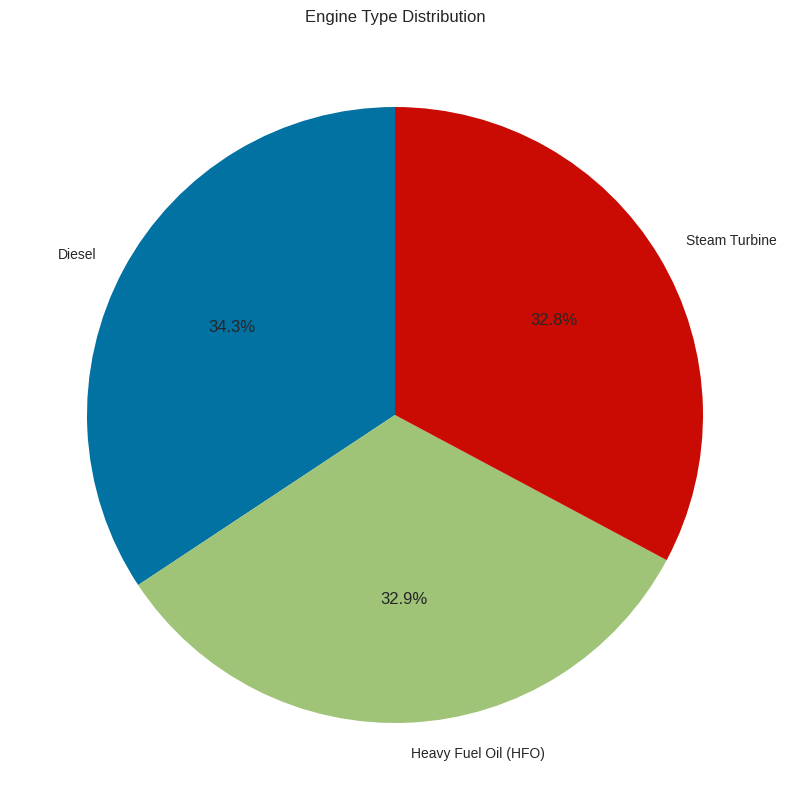

In [29]:
# Distribusi Engine Type dan menampilkan pie chart untuk visualisuasi

plt.figure(figsize=(10,10))
plt.pie(df['Engine_Type'].value_counts(), labels=['Diesel', 'Heavy Fuel Oil (HFO)', 'Steam Turbine'], autopct='%1.1f%%', startangle=90)
plt.title('Engine Type Distribution')
plt.show()

Dari hasil di atas, dapat disimpulkan bahwa persebaran tipe mesin kapal merata dan memiliki presentase yang hampir sama

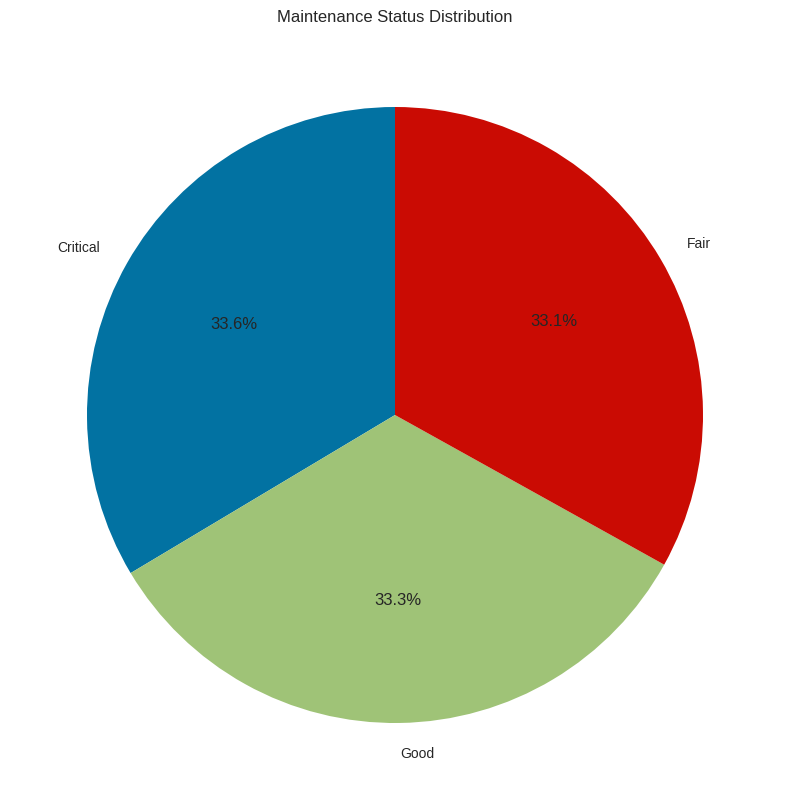

In [30]:
# Distribusi Maintenance_Status dan menampilkan pie chart untuk visualisuasi

plt.figure(figsize=(10,10))
plt.pie(df['Maintenance_Status'].value_counts(), labels=['Critical', 'Good', 'Fair'], autopct='%1.1f%%', startangle=90)
plt.title('Maintenance Status Distribution')
plt.show()

Dari hasil di atas, dapat disimpulkan bahwa persebaran status perawatan kapal merata dan memiliki presentase yang hampir sama

**Analisis Dana Operasional**

Disini kita akan melakukan binning. Dimana akan mengelompokkan dana operasional dalam 5 kategori(bins). Lalu kita visualkan dalam bentuk diagram batang (barchart)

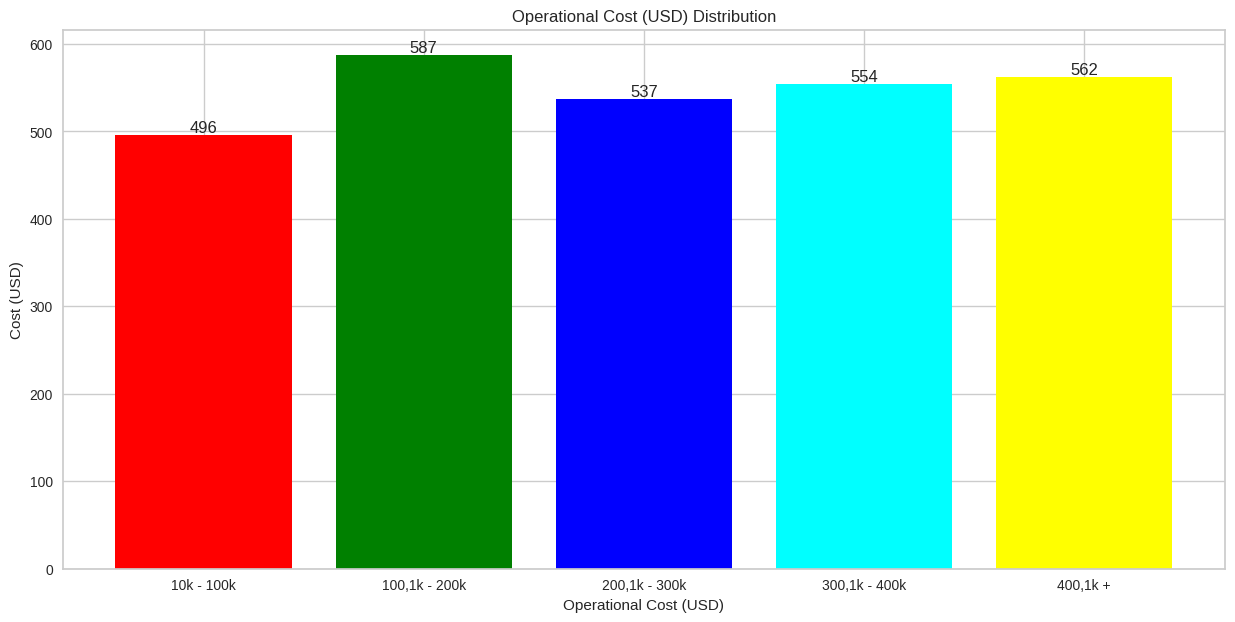

In [31]:
# Analisis Feature Numerik dengan melakukan pengelompokan data

range_cost1 = df.Operational_Cost_USD[(df.Operational_Cost_USD >= 10000) & (df.Operational_Cost_USD <= 100000)]
range_cost2 = df.Operational_Cost_USD[(df.Operational_Cost_USD >= 100000.1) & (df.Operational_Cost_USD <= 200000)]
range_cost3 = df.Operational_Cost_USD[(df.Operational_Cost_USD >= 200000.1) & (df.Operational_Cost_USD <= 300000)]
range_cost4 = df.Operational_Cost_USD[(df.Operational_Cost_USD >= 300000.1) & (df.Operational_Cost_USD <= 400000)]
cost_above400 = df.Operational_Cost_USD[df.Operational_Cost_USD >= 400000.1]

# Susun data untuk Plotting
ax = ['10k - 100k', '100,1k - 200k', '200,1k - 300k', '300,1k - 400k', '400,1k +']
ay = [len(range_cost1.values), len(range_cost2.values), len(range_cost3.values), len(range_cost4.values), len(cost_above400.values)]

# Buat Bar Chart
plt.figure(figsize=(15,7))
plt.bar(ax, ay, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Operational Cost (USD) Distribution")
plt.xlabel("Operational Cost (USD)")
plt.ylabel("Cost (USD)")

# Tambahkan label di setiap bar
for i in range(len(ax)) :
  plt.text(i, ay[i], ay[i], ha='center', va='bottom')

plt.show()

**Analisis Waktu Berlabuh**

Dengan cara yang sama, kita akan melakukan binning. Dimana akan mengelompokkan waktu kebutuhan berlabuh dalam 5 kategori(bins). Lalu kita visualkan dalam bentuk diagram batang (barchart)

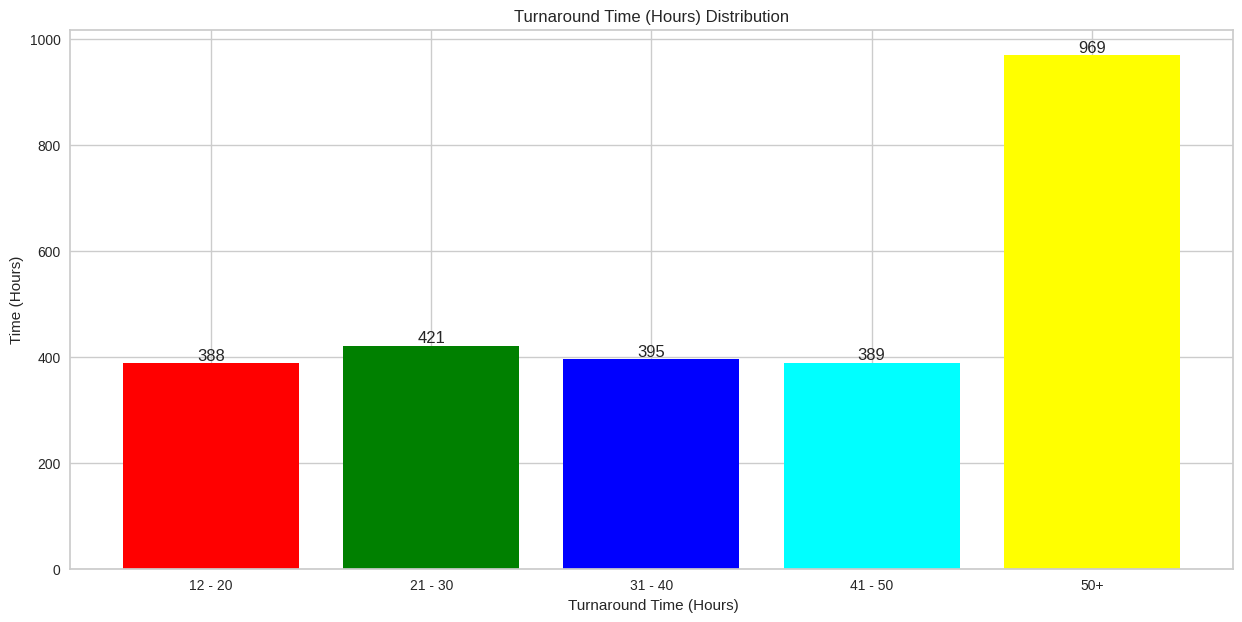

In [32]:
# Analisis Feature Numerik dengan melakukan pengelompokan data

range_time1 = df.Turnaround_Time_hours[(df.Turnaround_Time_hours >= 12) & (df.Turnaround_Time_hours <= 20)]
range_time2 = df.Turnaround_Time_hours[(df.Turnaround_Time_hours >= 21) & (df.Turnaround_Time_hours <= 30)]
range_time3 = df.Turnaround_Time_hours[(df.Turnaround_Time_hours >= 31) & (df.Turnaround_Time_hours <= 40)]
range_time4 = df.Turnaround_Time_hours[(df.Turnaround_Time_hours >= 41) & (df.Turnaround_Time_hours <= 50)]
time_above51 = df.Turnaround_Time_hours[df.Turnaround_Time_hours >= 51]

# Susun data untuk Plotting
ax = ['12 - 20', '21 - 30', '31 - 40', '41 - 50', '50+']
ay = [len(range_time1.values), len(range_time2.values), len(range_time3.values), len(range_time4.values), len(time_above51.values)]

# Buat Bar Chart
plt.figure(figsize=(15,7))
plt.bar(ax, ay, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Turnaround Time (Hours) Distribution")
plt.xlabel(" Turnaround Time (Hours)")
plt.ylabel("Time (Hours)")

# Tambahkan label di setiap bar
for i in range(len(ax)) :
  plt.text(i, ay[i], ay[i], ha='center', va='bottom')

plt.show()

Waktu berlabuh terbesar ada pada bins dengan turnaround time lebih dari 50 jam. Hal ini mengindikasikan adanya masalah dalam waktu yang bisa saja berhubungan pada operasional kapal maupun kinerjanya.

**Analisis Pengaruh Musim**

Dengan cara yang sama, kita akan melakukan binning. Dimana akan mengelompokkan nilai dari pengaruh musim dalam 5 kategori(bins). Lalu kita visualkan dalam bentuk diagram batang (barchart)

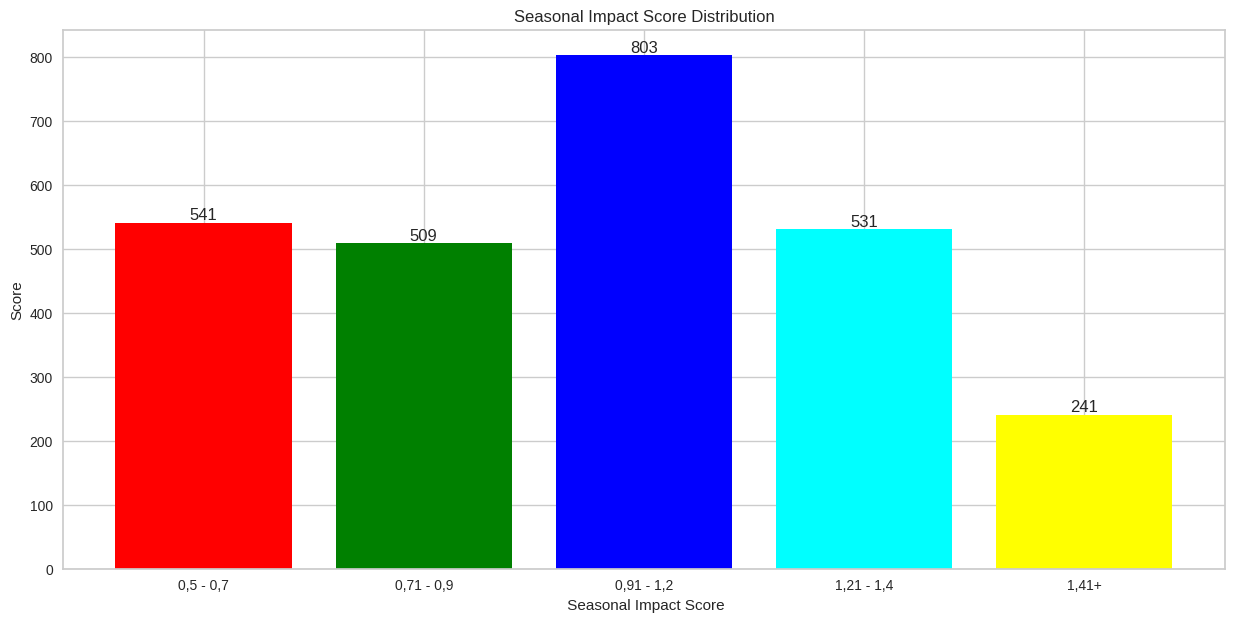

In [33]:
# Analisis Feature Numerik dengan melakukan pengelompokan data

season_impact1 = df.Seasonal_Impact_Score[(df.Seasonal_Impact_Score >= 0.5) & (df.Seasonal_Impact_Score <= 0.7)]
season_impact2 = df.Seasonal_Impact_Score[(df.Seasonal_Impact_Score >= 0.71) & (df.Seasonal_Impact_Score <= 0.9)]
season_impact3 = df.Seasonal_Impact_Score[(df.Seasonal_Impact_Score >= 0.91) & (df.Seasonal_Impact_Score <= 1.2)]
season_impact4 = df.Seasonal_Impact_Score[(df.Seasonal_Impact_Score >= 1.21) & (df.Seasonal_Impact_Score <= 1.4)]
impact_above = df.Seasonal_Impact_Score[df.Seasonal_Impact_Score >= 1.41]

# Susun data untuk Plotting
ax = ['0,5 - 0,7', '0,71 - 0,9', '0,91 - 1,2', '1,21 - 1,4', '1,41+']
ay = [len(season_impact1.values), len(season_impact2.values), len(season_impact3.values), len(season_impact4.values), len(impact_above.values)]

# Buat Bar Chart
plt.figure(figsize=(15,7))
plt.bar(ax, ay, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Seasonal Impact Score Distribution")
plt.xlabel(" Seasonal Impact Score")
plt.ylabel("Score")

# Tambahkan label di setiap bar
for i in range(len(ax)) :
  plt.text(i, ay[i], ay[i], ha='center', va='bottom')

plt.show()

Impact Score terteinggi dimiliki oleh impact range antara 0,91 - 1,2

****

**Periksa sebaran data tiap fitur**

Fitur yang diperiksa adalah fitur numerik

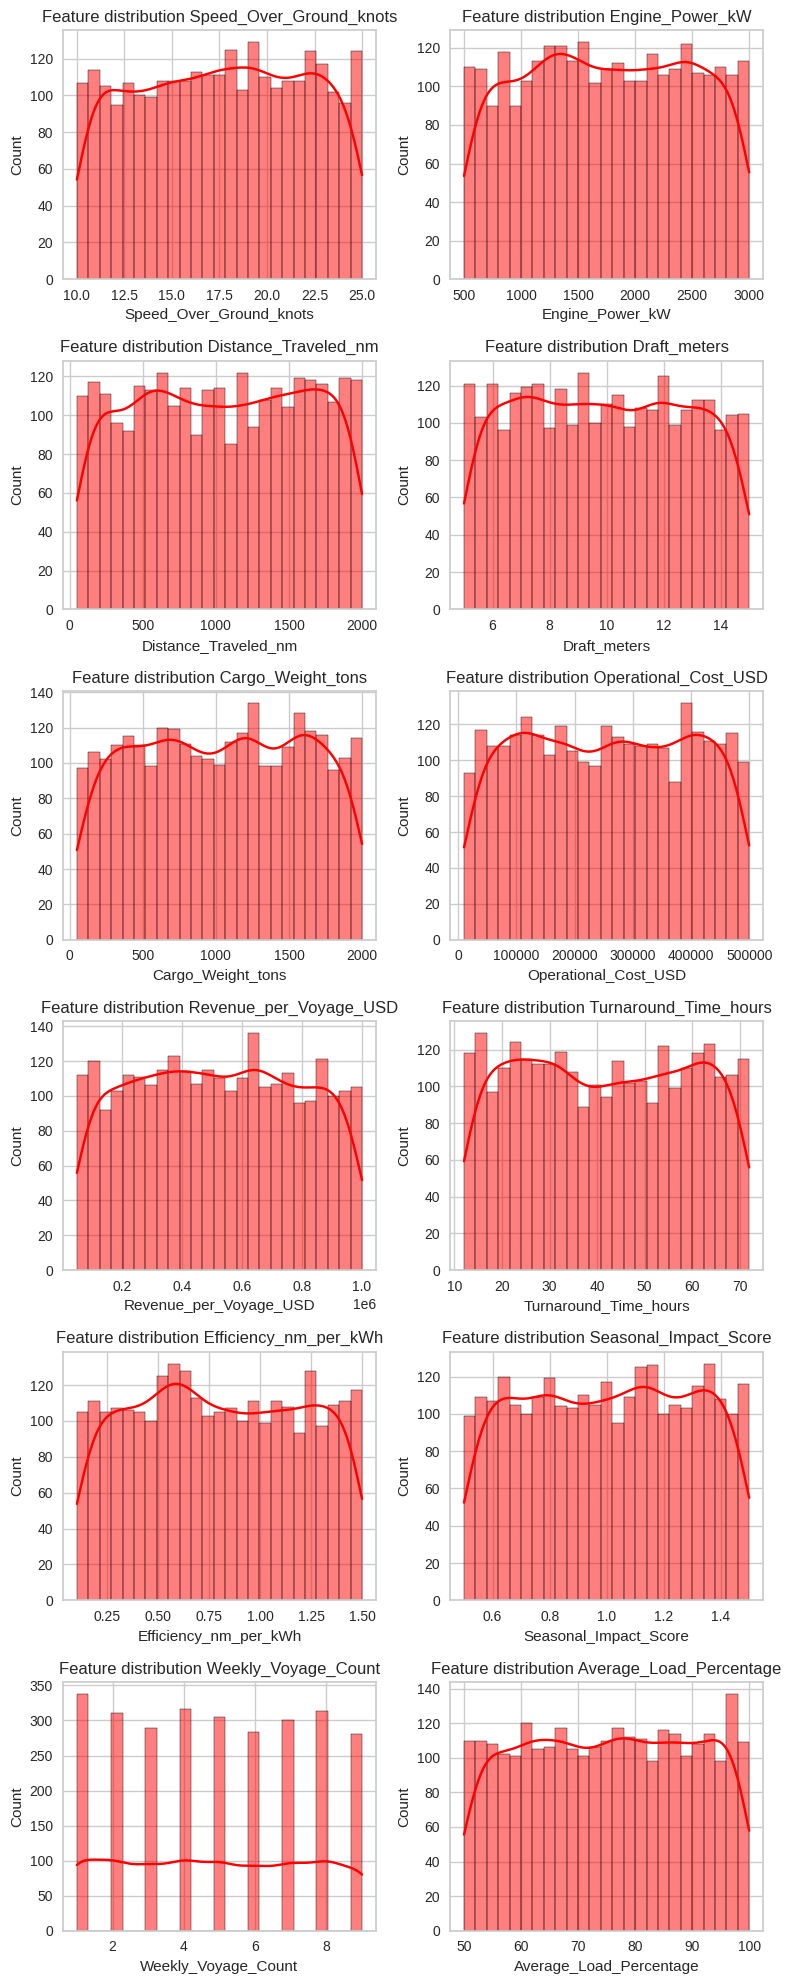

In [34]:
# BUAT VISUALISASI DITRIBUSI TIAP FITUR NUMERIK
num_feature = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,20))
for i, column in enumerate(num_feature.columns, 1):
  plt.subplot(6,2,i)
  sns.histplot(df[column], bins=25, kde=True, color='red')
  plt.title(f"Feature distribution {column}")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Fetaure Corelation')

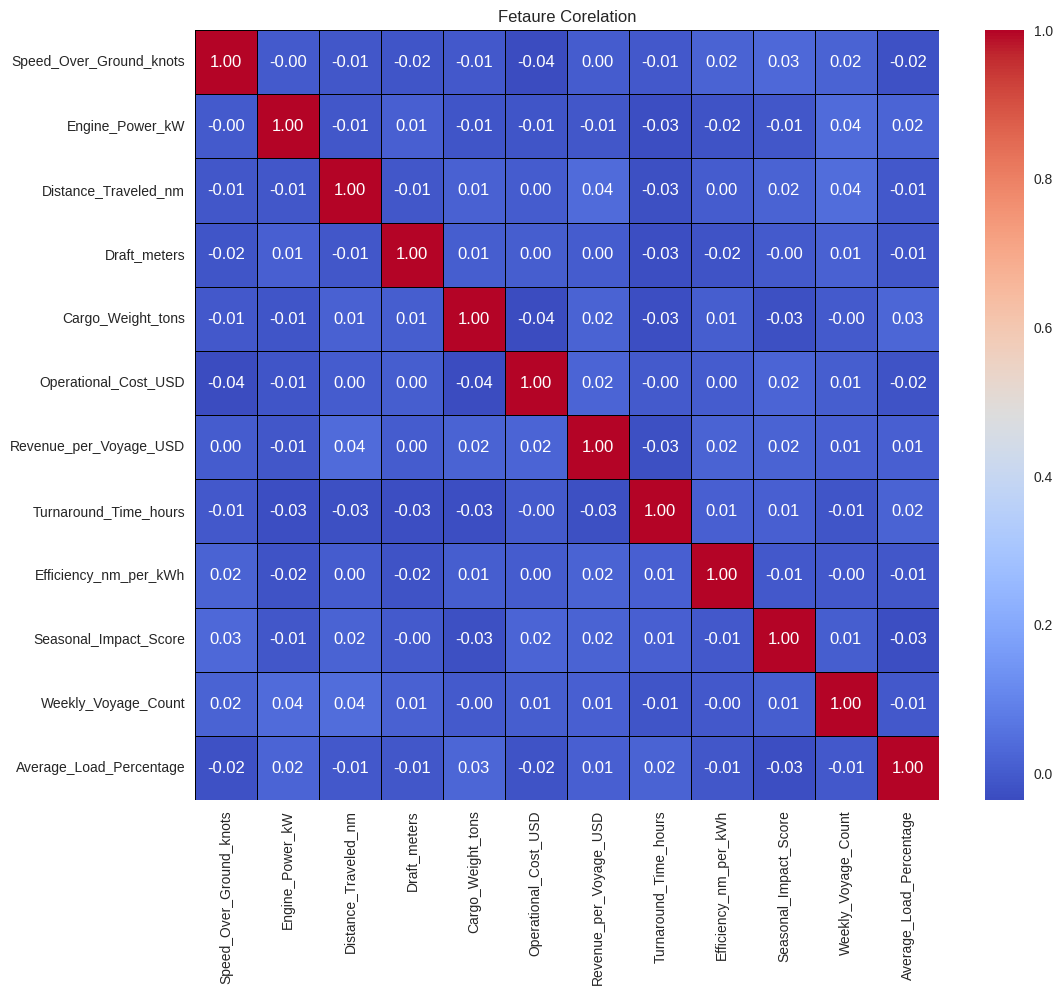

In [35]:
# LAKUKAN VISUALISASI HEATMAP KORELASI FEATURE

plt.figure(figsize=(12,10))
mat_cor = num_feature.corr()
sns.heatmap(mat_cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Fetaure Corelation")

**PENJELASAN:**

Dilihat dari diagram korelasi, tidak ada fitur yang saling berhubungan dengan kuat(dominasi 95% warna biru)

<br>
Hal ini menunjukkan persebaran data sangat luas, banyak infomasi bisa diperoleh, dan tidak melakukan drop pada fitur yang berelasi kuat dengan fitur penting

# Data Preprocessing

1. Drop Fitur tidak penting
2. Tangani Missing Value
3. Outliers Handling
4. Encoding data kategorik
5. Scaling data numerik
6. Cek distribusi after preprocessing

In [35]:
# Drop Fitur Tidak Perlu
# Fitur yang diperlukan (Engine_Type, Maintenance_Status, Operational_Cost_USD, Seasonal_impact_score, Turaround_time_hours)

df = df.drop(columns=['Date', 'Ship_Type', 'Route_Type', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Revenue_per_Voyage_USD', 'Efficiency_nm_per_kWh', 'Weekly_Voyage_Count', 'Average_Load_Percentage'])
print(df.columns)

In [ ]:
# Handle Missing Value
print("Missing Value: ")
print(df.isnull().sum())

In [ ]:
df['Engine_Type'] = df['Engine_Type'].fillna(df['Engine_Type'].mode()[0])
df['Maintenance_Status'] = df['Maintenance_Status'].fillna(df['Maintenance_Status'].mode()[0])

In [ ]:
# Handle Missing Value
print("Missing Value: ")
print(df.isnull().sum())

Missing Value pada fitur penting selesai di tangani dengan menggunakan fungsi modus. Hal ini berarti kolom kolom kosong akan diisi dengan nilai modus dari fitur

**Outliers Handling**

Melakukan check dan handling outliers untuk fitur numerik

In [ ]:
print(f"Dimensi data: {df.shape}")

In [68]:
# DETEKSI OUTLIER DAN DROP OUTLIER

# Pilih kolom numerik yang ingin diperiksa outlier-nya
num_cols = ['Operational_Cost_USD', 'Turnaround_Time_hours', 'Seasonal_Impact_Score']

# Buat salinan dataframe agar aman
df_clean = df.copy()

# Loop tiap kolom untuk deteksi dan hapus outlier
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data di luar batas sebagai outlier
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Sisa data setelah membuang outlier: {df_clean.shape}")


Sisa data setelah membuang outlier: (2736, 18)


TIDAK TERDAPAT OUTLIERS, sehingga aman untuk lanjut ke tahap selanjutnya.

**Encoding Fitur Kategorik**

Kategorikal Feature yang akan di encoding adalah Engine_Type dan Maintenance_Status

In [66]:
# Label Encoding Tipe Mesin
le = LabelEncoder()
df_clean['Engine_Type'] = le.fit_transform(df['Engine_Type'])

# Lihat hasil Encoding Tipe Mesin
engine_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping kategori Tipe Mesin ke angka: ", engine_mapping)

df_clean.head()

Mapping kategori Tipe Mesin ke angka:  {'Diesel': np.int64(0), 'Heavy Fuel Oil (HFO)': np.int64(1), 'Steam Turbine': np.int64(2), nan: np.int64(3)}


,Engine_Type,Maintenance_Status,Operational_Cost_USD,Turnaround_Time_hours,Seasonal_Impact_Score
0,1,0,483832.3545,25.867077,1.415653
1,2,2,483388.0005,63.248196,0.885648
2,0,1,448543.4040,49.418150,1.405813
3,2,1,261349.6054,22.409110,1.370704
4,0,1,287718.3752,64.158231,0.583383


In [67]:
# Label Encoding Status Perawatan
lee = LabelEncoder()
df_clean['Maintenance_Status'] = lee.fit_transform(df['Maintenance_Status'])

# Lihat hasil Encoding Status Perawatan
maintenance_mapping = dict(zip(lee.classes_, lee.transform(lee.classes_)))
print("\nMapping kategori Status Perawatan ke angka: ", maintenance_mapping)

df_clean.head()


Mapping kategori Status Perawatan ke angka:  {'Critical': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), nan: np.int64(3)}


,Engine_Type,Maintenance_Status,Operational_Cost_USD,Turnaround_Time_hours,Seasonal_Impact_Score
0,1,0,483832.3545,25.867077,1.415653
1,2,2,483388.0005,63.248196,0.885648
2,0,1,448543.4040,49.418150,1.405813
3,2,1,261349.6054,22.409110,1.370704
4,0,1,287718.3752,64.158231,0.583383


**Data Splitting**

1. Mengambil dua kolom dari dataset yakni Operational Cost USD dan Turnaround Time Hours
2. Masukkan kedua fitur ke dalam array X untuk analisa lanjut
3. Ambil data dari format DataFrame sesuai nama kolom.

In [52]:
X = df_clean.copy()
X = X.iloc[:, [0,1,2,3,4]].values
print(pd.DataFrame(X, columns=['Engine_Type','Maintenance_Status','Operational Cost(USD)', 'Turnaround Time(hours)','Seasonal_Impact_Score']))

      Engine_Type  Maintenance_Status  Operational Cost(USD)  \
0             1.0                 0.0           483832.35450   
1             2.0                 2.0           483388.00050   
2             0.0                 1.0           448543.40400   
3             2.0                 1.0           261349.60540   
4             0.0                 1.0           287718.37520   
...           ...                 ...                    ...   
2731          1.0                 2.0           237975.06730   
2732          1.0                 2.0            21029.02172   
2733          2.0                 0.0            78883.31253   
2734          1.0                 2.0            25241.55025   
2735          2.0                 1.0            55163.24167   

      Turnaround Time(hours)  Seasonal_Impact_Score  
0                  25.867077               1.415653  
1                  63.248196               0.885648  
2                  49.418150               1.405813  
3              

# Clustering K-Means

1. Elbow Methode
2. Cluster K-Means

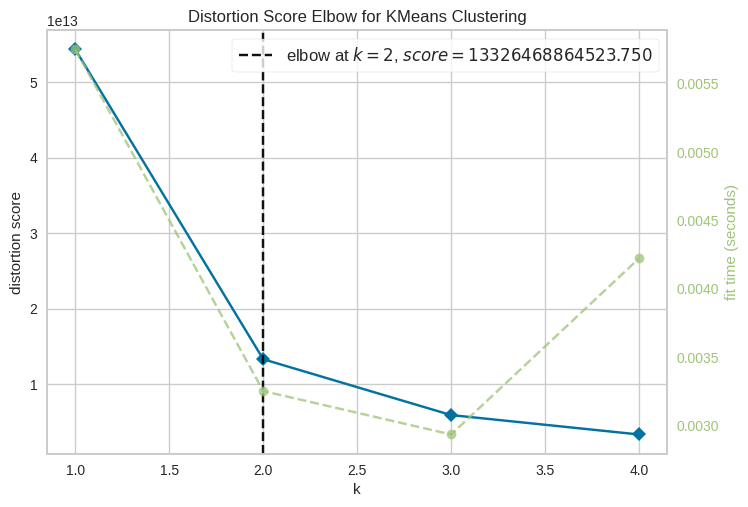

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Elbow Methode
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 5))
visualizer.fit(X)
visualizer.show()


In [54]:
# K-Means Clustering
from sklearn.cluster import KMeans

# Inisialisasi dan latih model KMeans dg cluster = 2 dg data yang sudah disiapkan (X)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# dapatkan label cluster
labels = kmeans.labels_

# jumlah cluster
k = 2

# buat func untuk analisis karakteristik cluster
def analis(X, labels, k):
  print("Analisis ciri setiap Cluster (K-Means): ")
  for cluster_id in range(k):
    # ambil data cluster
    cluster_data = X[labels == cluster_id]

    # hitung rata-rata setiap fitur dalam cluster
    engine = cluster_data[:, 0].mean()
    maintenance = cluster_data[:, 1].mean()
    opr_cost = cluster_data[:, 2].mean()
    turn_time = cluster_data[:, 3].mean()
    season = cluster_data[:, 4].mean()

    print(f"\nCluster {cluster_id + 1:}")
    print(f"Engine Type : {engine:.2f}")
    print(f"Maintenance Status : {maintenance:.2f}")
    print(f"Operational Cost(USD) : {opr_cost:.2f}")
    print(f"Turnaround Time(hours) : {turn_time:.2f}")
    print(f"Seasonal_Impact_Score : {season:.2f}")
    print("-"*40)

# analisis setiap cluster
analis(X, labels, k)

Analisis ciri setiap Cluster (K-Means): 

Cluster 1
Engine Type : 0.93
Maintenance Status : 1.04
Operational Cost(USD) : 131524.16
Turnaround Time(hours) : 41.70
Seasonal_Impact_Score : 1.00
----------------------------------------

Cluster 2
Engine Type : 0.94
Maintenance Status : 1.07
Operational Cost(USD) : 376257.94
Turnaround Time(hours) : 41.79
Seasonal_Impact_Score : 1.01
----------------------------------------


# DBSCAN Clustering

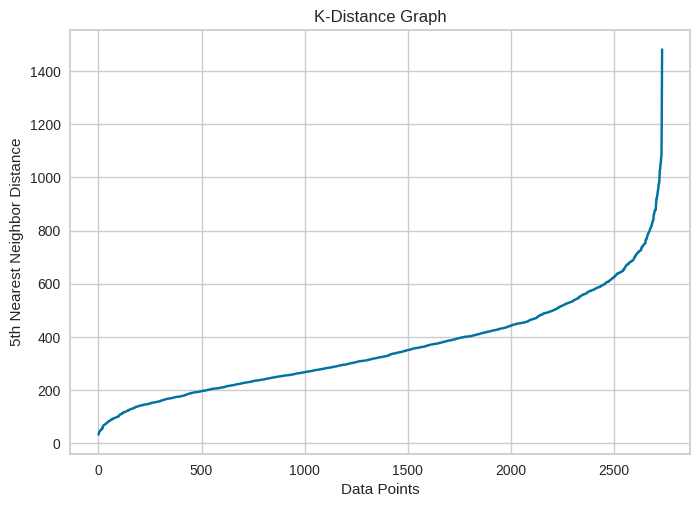

In [40]:
# cari nilai EPSON dengan metode k-distance graph
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_clean)
distances, indices = nbrs.kneighbors(df_clean)

# Urutkan jarak dan plot
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph")
plt.grid(True)
plt.show()

In [61]:
# Run model DBSCAN
# 5 feature -> min sampel = 15

dbscan = DBSCAN(eps=750, min_samples=20)
dbscan.fit(df_clean)

df_cleaned = df_clean.copy()
# Tambahkan Label ke data
df_cleaned['Cluster'] = dbscan.labels_

In [62]:
print("Analisis ciri setiap Cluster (DBSCAN): ")
for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster_id]
    engine = cluster_data['Engine_Type'].mean()
    maintenance_stat = cluster_data['Maintenance_Status'].mean()
    opr_cost = cluster_data['Operational_Cost_USD'].mean()
    turn_time = cluster_data['Turnaround_Time_hours'].mean()
    season_impact = cluster_data['Seasonal_Impact_Score'].mean()

    print(f"Cluster {cluster_id}")
    print(f"Engine Type               : {engine:.2f}")
    print(f"Maintenance Status        : {maintenance_stat:.2f}")
    print(f"Operational Cost (USD)    : {opr_cost:.2f}")
    print(f"Turnaround Time (hours)   : {turn_time:.2f}")
    print(f"Seasonal Impact Score     : {season_impact:.2f}")
    print("-" * 40)

Analisis ciri setiap Cluster (DBSCAN): 
Cluster -1
Engine Type               : 0.94
Maintenance Status        : 1.06
Operational Cost (USD)    : 255774.68
Turnaround Time (hours)   : 41.78
Seasonal Impact Score     : 1.00
----------------------------------------
Cluster 0
Engine Type               : 0.76
Maintenance Status        : 0.95
Operational Cost (USD)    : 173521.14
Turnaround Time (hours)   : 37.82
Seasonal Impact Score     : 1.02
----------------------------------------


# Model Evaluation

1. Silhoutte Score
2. Visualisasi

In [46]:
score_Kmeans = silhouette_score(X, labels)
print(f"Silhoutte Score KMeans: {score_Kmeans:.2f}")

score_dbscan = silhouette_score(df_cleaned, labels)
print(f"Silhoutte Score DBSCAN: {score_dbscan:.2f}")

Silhoutte Score KMeans: 0.63
Silhoutte Score DBSCAN: 0.63


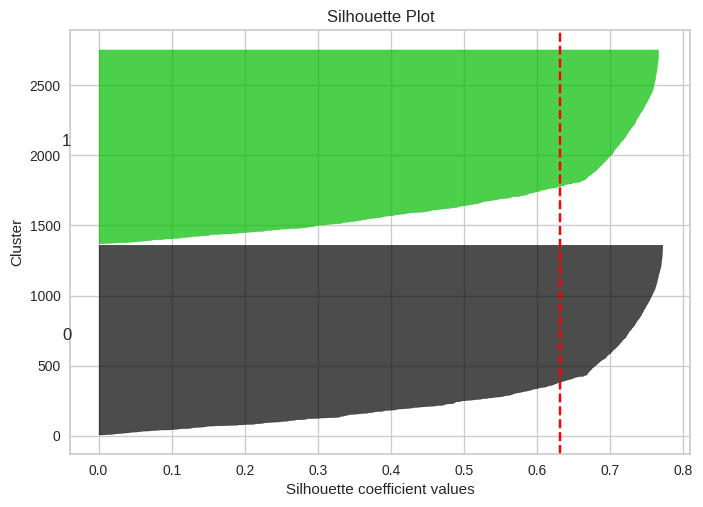

In [50]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

silhouette_vals = silhouette_samples(X, labels)
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.title("Silhouette Plot")
plt.axvline(x=score_dbscan, color="red", linestyle="--")
plt.show()
